# CNN Primer


### Motivation and Basic CNN Theory

Linear Classification

![Img1](https://cs231n.github.io/assets/svmvssoftmax.png)

A single non-linear neuron

![Img2](https://cs231n.github.io/assets/nn1/neuron.png)
![Img0](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

A typical Neural Network

![Img3](https://cs231n.github.io/assets/nn1/neural_net.jpeg)


A typical Convolutional Neural Network

![Img4](https://www.researchgate.net/publication/336805909/figure/fig1/AS:817888827023360@1572011300751/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26.ppm)

# Section 3: Using pretrained CNN models

In [1]:
# this notebook is a tutorial on how to use pretrained CNN models and torch, so the notbook should have a lot of addtional experiments, print statements, and comments
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
zipfilepath=r"/content/drive/MyDrive/imagenette2-160.zip"
extracted_dataset_directory="./data"

In [14]:
# import required librarires
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


## 3.1 Explore the dataset

In [3]:
#first extract the ZIP file
import zipfile
with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
    zip_ref.extractall(extracted_dataset_directory)
     

In [8]:
# let's print the directory structure
def print_directory_structure(directory, prefix=""):
    """
    This function prints the directory structure in a tree format
    Args:
        directory:  the directory to print the structure of
        prefix:   the prefix to add before the directory name
    Returns: None
    """
    for item in os.listdir(directory):        
        if os.path.isdir(os.path.join(directory, item)):
            nfiles=len(os.listdir(os.path.join(directory, item)))
            print("-",prefix+item,':\t',nfiles)
            print_directory_structure(os.path.join(directory, item), prefix+"\t")
print_directory_structure(extracted_dataset_directory)

- imagenette2-160 :	 4
- 	train :	 11
- 		n01440764 :	 963
- 		n02102040 :	 955
- 		n02979186 :	 993
- 		n03000684 :	 858
- 		n03028079 :	 941
- 		n03394916 :	 956
- 		n03417042 :	 961
- 		n03425413 :	 931
- 		n03445777 :	 951
- 		n03888257 :	 960
- 	val :	 10
- 		n01440764 :	 387
- 		n02102040 :	 395
- 		n02979186 :	 357
- 		n03000684 :	 386
- 		n03028079 :	 409
- 		n03394916 :	 394
- 		n03417042 :	 389
- 		n03425413 :	 419
- 		n03445777 :	 399
- 		n03888257 :	 390


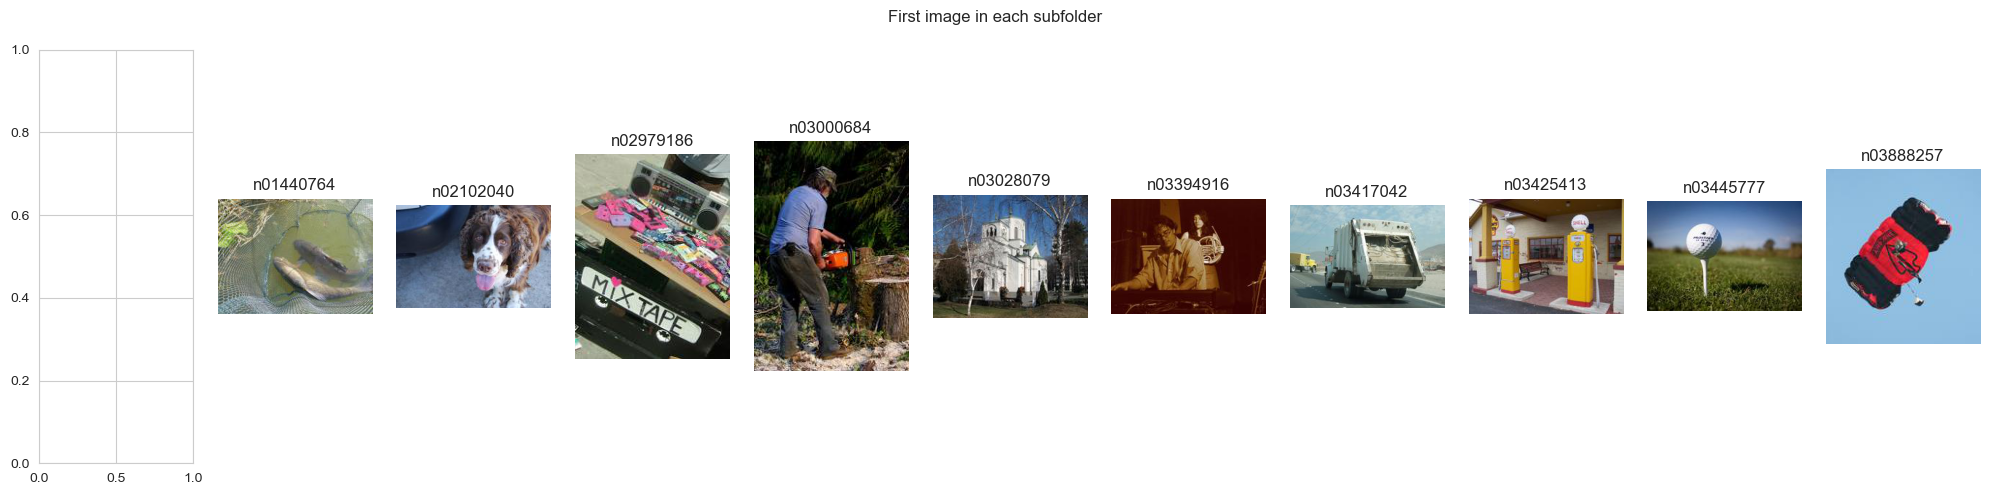

In [30]:
# Let's visualize the first image in each subfolder
def visualize_first_image_each_subfolder(directory):
    """
    This function visualizes the first image in each subfolder of the given directory
    Args:
        directory:  the directory containing subfolders with images
    Returns: paths to the images
    """
    
    n_subfolders=len(os.listdir(directory)) # get the number of subfolders for plotting
    fig, ax = plt.subplots(1,n_subfolders,figsize=(20,5)) # create a figure with n_subfolders subplots
    img_paths=[]
    for i,item in enumerate(os.listdir(directory)):  # iterate over the subfolders        
        if os.path.isdir(os.path.join(directory, item)):
            image_path=os.path.join(directory, item,os.listdir(os.path.join(directory, item))[0]) # get the first image in the directory
            img_paths.append(image_path)
            # open the image and convert it to RGB and plot it
            img = Image.open(image_path).convert('RGB') 
            ax[i].imshow(img)
            ax[i].set_title(item)
            ax[i].axis('off')
            
    fig.suptitle("First image in each subfolder")
    fig.tight_layout()
    plt.show()
    return img_paths
            
demo_image_paths=visualize_first_image_each_subfolder(os.path.join(extracted_dataset_directory,"imagenette2-160","train"))


## 3.2 Load the pretrained model
- We use VGG16 model pretrained on ImageNet dataset, to classify the images in the imagenette dataset.
- Models and tensors(multi-dimensional arrays) need to be on the same device (CPU or GPU) to perform operations. 
- The GPU's architecure is optimized for parallel computations and matrix operations, so it is faster than CPU for deep learning tasks.


In [19]:
import torch # first we import torch : the deep learning library
from torchvision import transforms # transforms are used to preprocess the images
from torchvision.models import vgg16 # import the VGG16 model from torchvision
print("GPU available: ",torch.cuda.is_available())# check if GPU is available
device=torch.device("cuda" if torch.cuda.is_available() else "cpu") # set the device to GPU if available, else CPU

vgg16_model = vgg16(weights='IMAGENET1K_V1') # load the pretrained VGG16 model
vgg16_model.to(device) 
vgg16_model.eval() # set the model to evaluation mode. The modes can be 'train' or 'eval'. The 'eval' mode is used for inference.
# print the model summary
print(vgg16_model)

GPU available:  True
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, 

In [33]:
# also load the class labels for the ImageNet dataset
url_imagenet="https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
import urllib
class_labels = urllib.request.urlopen(url_imagenet).read().decode().split('\n')
# print the first 10 class labels
print(class_labels[:10])


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich']


# 3.3 Model Inference
Preprocessing:
- The input images need to be preprocessed before feeding them to the model.
- The images are resized to 224x224 pixels, center cropped, converted to tensor, and normalized.
- The normalization is done using the mean and standard deviation of the ImageNet dataset.

original image size: (239, 160)
image tensor shape: torch.Size([1, 3, 224, 224])


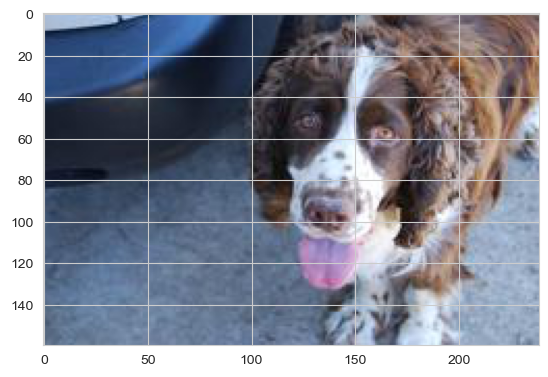

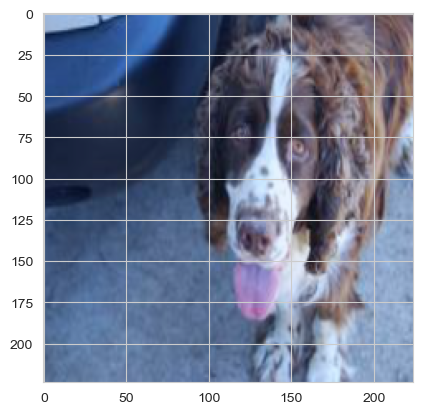

In [109]:
preprocess=transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224,224)),  
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)
# example preprocessing
image_path=demo_image_paths[1]
img = Image.open(image_path).convert('RGB') # open the image and convert it to RGB
img_tensor = preprocess(img).unsqueeze(0).to(device) # apply the preprocessing pipeline
# convert the tensor to numpy array and change the channel order for plotting

def tensor_to_numpy(tensor):
    x= tensor.cpu().squeeze().numpy().transpose(1,2,0)
    return (x-x.min())/(x.max()-x.min())

def plot_image(img_tensor):
    plt.imshow(tensor_to_numpy(img_tensor))
    # turn off axis
    plt.axis('off')
    plt.show()
    
img_tensor_np=tensor_to_numpy(img_tensor)
print(f"original image size: {img.size}")
print(f"image tensor shape: {img_tensor.shape}")


plt.imshow(img) # plot the original image
plt.show()
plt.imshow((img_tensor_np- img_tensor_np.min())/(img_tensor_np.max()-img_tensor_np.min())) # plot the preprocessed image
plt.show()

### Inference:
- We pass the preprocessed image through the model to get the output. THe model expects a batch of images, so we add a batch dimension to the input tensor.
- Models in PyTorch are callable, so we can call the model like a function.
- The output tensor is called logits. It contains the raw scores for each class.

In [103]:
image_path=demo_image_paths[2]
img = Image.open(image_path).convert('RGB') # open the image and convert it to RGB
img_tensor = preprocess(img).unsqueeze(0).to(device) # apply the preprocessing pipeline and add a batch dimension

with torch.no_grad(): # disable gradient computation 
    output=vgg16_model(img_tensor) # forward pass
output=np.squeeze(output.cpu().numpy()) # move the output tensor to CPU and convert it to numpy array
print(output.shape)

(1000,)


CD player 11.128665
tape player 11.080538
hard disc 10.136738
cassette 9.9177885
cassette player 9.864256


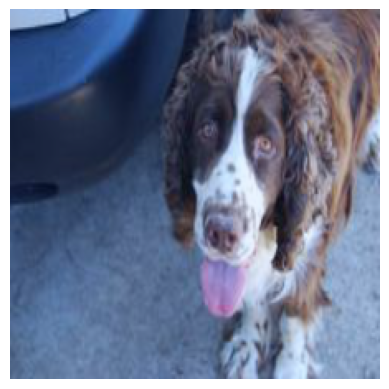

In [110]:
# select the top 5 classes. Print the class labels and the corresponding probabilities
top5_classes=np.argsort(output)[::-1][:5]
for i in top5_classes:
    print(class_labels[i],output[i])
# visualize the image
plot_image(img_tensor)



# 3.4 Visualizing intermediate layers
- We can visualize the intermediate layers of the CNN model to understand how the model works,what features it learns and so on.
- Getting intermediatte layers is not trivial in PyTorch. We need to register hooks to get the intermediate outputs.
### VG16 architecture:
Below is the VGG16 architecture. We can visualize the outputs of the maxpool layers.
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*UeAhoKM0kJfCPA03wt5H0A.png)

In [90]:
# first lets get a list of individual layers in the model ( open https://miro.medium.com/v2/resize:fit:720/format:webp/1*UeAhoKM0kJfCPA03wt5H0A.png to see the architecture of VGG16)
for idx,(name, module) in enumerate(vgg16_model.named_modules()):    
    if len(list(module.children()))==0:
        print(name, module)

features.0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.1 ReLU(inplace=True)
features.2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.3 ReLU(inplace=True)
features.4 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
features.5 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.6 ReLU(inplace=True)
features.7 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.8 ReLU(inplace=True)
features.9 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
features.10 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.11 ReLU(inplace=True)
features.12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.13 ReLU(inplace=True)
features.14 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
features.15 ReLU(inplace=True)
features.16 MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [111]:
# We can visualize a fraction of the intermediate layers. As an example, we can visualize the outputs of the maxpool layers and the avgpool layer.
layers_to_visualize=[]
for idx,(name, module) in enumerate(vgg16_model.named_modules()):    
    if isinstance(module,torch.nn.MaxPool2d):
        layers_to_visualize.append(name)
    elif  name=='features.1':
        layers_to_visualize.append(name)
print(layers_to_visualize)

['features.1', 'features.4', 'features.9', 'features.16', 'features.23', 'features.30']


In [124]:
class CNN_with_hooks(torch.nn.Module):
    def __init__(self,model,layers_to_save):
        super(CNN_with_hooks,self).__init__()
        self.model=model
        self.layers_to_save=layers_to_save
        self.intermediate_outputs={} # dictionary to store the intermediate outputs
        self.handles=[] # list to store the hooks
        self.register_hooks() # register the hooks
        
    def register_hooks(self):
        def hook_fn(module, input, output, name):
            self.intermediate_outputs[name]=output # store the intermediate output in the dictionary
        
        for name, module in self.model.named_modules(): # iterate over the modules in the model
            if name in self.layers_to_save: # check if the module is in the layers to visualize
                handle=module.register_forward_hook(lambda module, input, output, name=name: hook_fn(module, input, output, name)) # register a hook to get the intermediate output
                self.handles.append(handle) # store the hook in the list
    
    def remove_hooks(self):
        for handle in self.handles: # iterate over the hooks
            handle.remove() # remove the hook
        self.handles=[] # clear the list of hooks
        
    def forward(self,x):
        return self.model(x) # forward pass through the model
    
    def get_intermediate_output(self):
        return self.intermediate_outputs # return the intermediate outputs
    
vgg_16_with_hooks=CNN_with_hooks(vgg16_model,layers_to_visualize) # create a class with hooks


In [125]:
# visualize the intermediate outputs
image_path=demo_image_paths[5]
img = Image.open(image_path).convert('RGB') # open the image and convert it to RGB
img_tensor = preprocess(img).unsqueeze(0).to(device) # apply the preprocessing pipeline and add a batch dimension
with torch.no_grad(): # disable gradient computation 
    output=vgg_16_with_hooks(img_tensor) # forward pass
    intermediate_outputs=vgg_16_with_hooks.get_intermediate_output() # get the intermediate output
vgg_16_with_hooks.remove_hooks()    

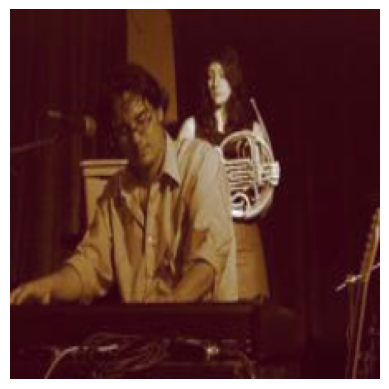

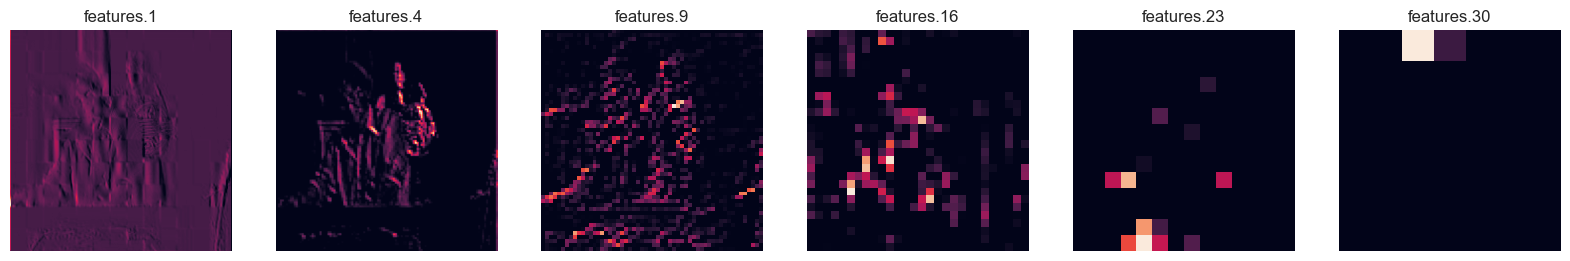

In [126]:
# plot the intermediate outputs
plot_image(img_tensor)
fig, ax = plt.subplots(1,len(intermediate_outputs),figsize=(20,5))
for i,(name, output) in enumerate(intermediate_outputs.items()):
    output=output.cpu().numpy()
    ax[i].imshow(output[0,0])
    ax[i].set_title(name)
    ax[i].axis('off')

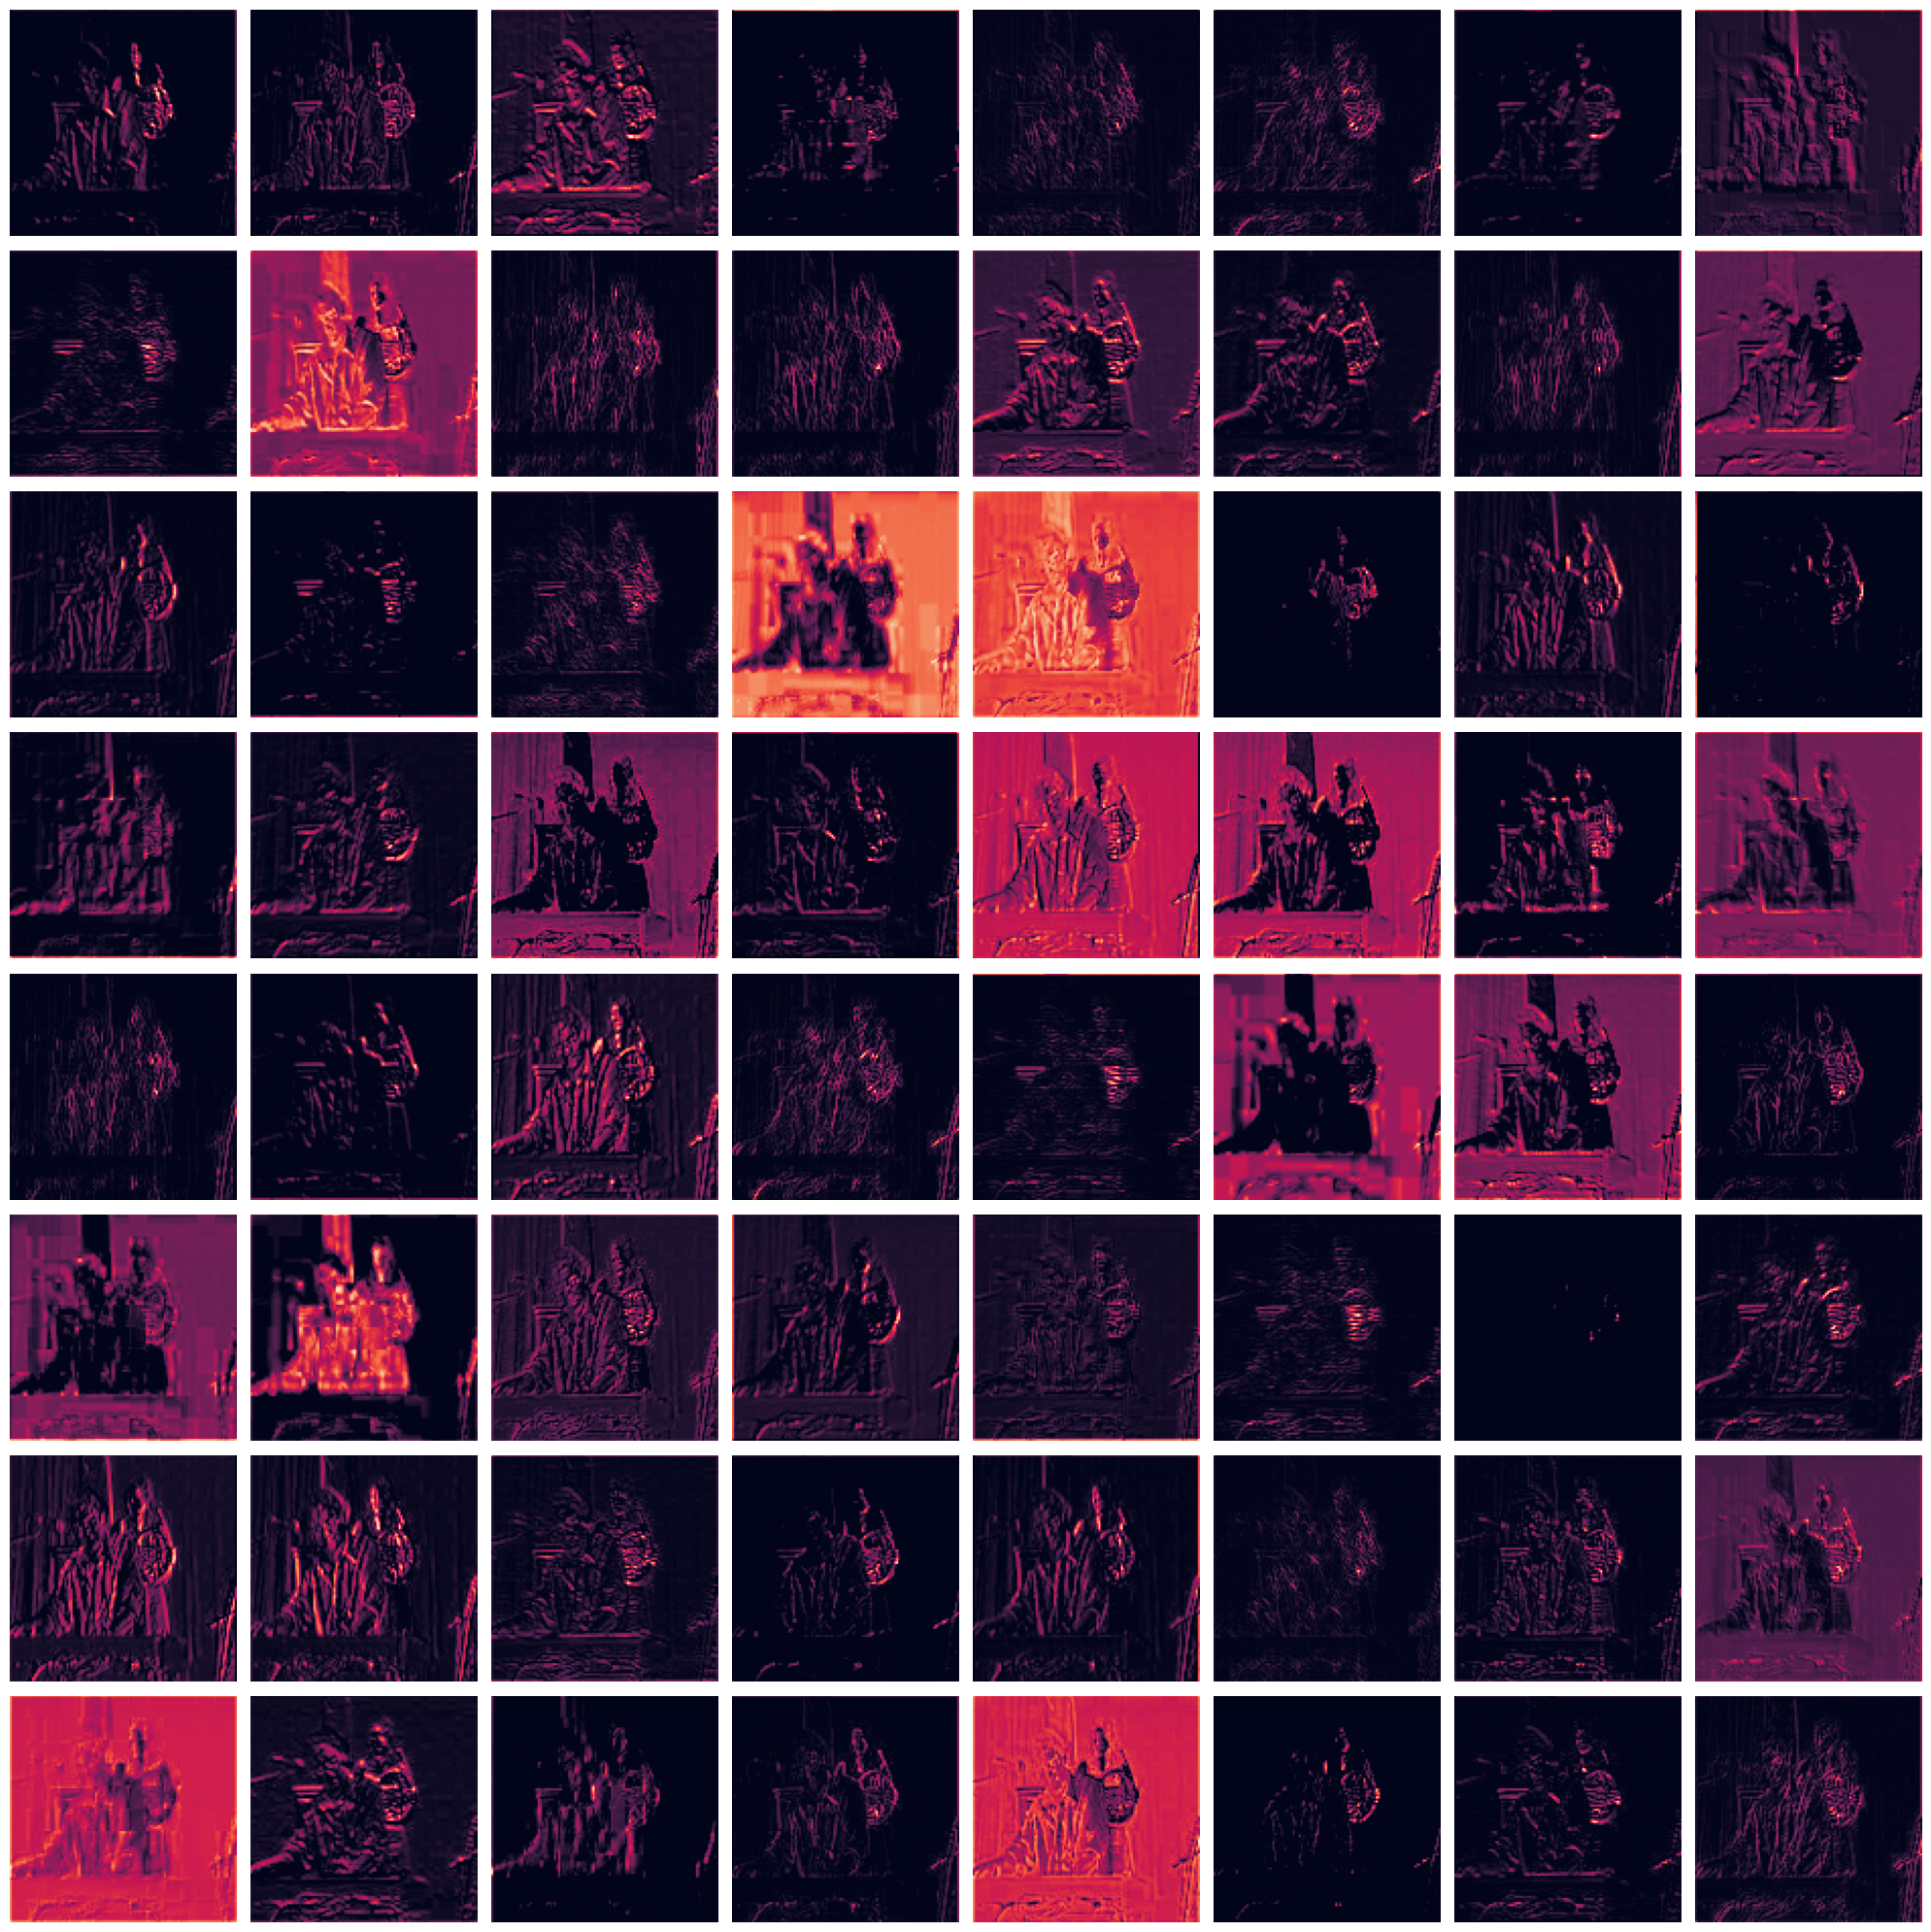

In [128]:
# visualize all the feature maps from an earlier layer
layer_name='features.4'
output=intermediate_outputs[layer_name].cpu().squeeze().numpy()
n_features=output.shape[0]
dim1=int(np.ceil(np.sqrt(n_features)))
dim2=int(np.ceil(n_features/dim1))
fig, ax = plt.subplots(dim1,dim2,figsize=(20,20))
for i in range(n_features):
    ax[i//dim2,i%dim2].imshow(output[i])
    ax[i//dim2,i%dim2].axis('off')
fig.tight_layout()
plt.show()
